<a href="https://colab.research.google.com/github/yonaorpilla/Orpilla-SYM_EmTech-Lab/blob/main/ProgramAss_5_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PA 5**

#### **Course:** ECE Elective 2 Emerging Technologies
#### **Program:** BS ECE

* *Al-Hajri, Sarah Bint Mubarak F.*
* *Camonias, Elizhea C.*
* *Orpilla, Sigmund Yona Marie A.*

---

---
You are a cybersecurity intern at SecureNet Corp. The company has been experiencing various network security breaches, and your team is tasked with developing a machine learning model to classify different types of cyberattacks.  

The senior engineer hands you a dataset of simulated network traffic and says, "We need a robust classifier to detect attacks like DDoS, Botnet, and others. Use your ML skills to build this. Oh, and don’t forget—real-world data is messy; make sure your model can handle it."

Your goal is to preprocess the data and train a Random Forest classifier to identify the type of attack.

---

**DATASET**

The dataset cyber_attacks.csv contains the following features:

*   protocol_type: Protocol (0: TCP, 1: UDP, 2: ICMP).  
*   duration: Connection duration (seconds).
*   src_bytes: Bytes sent from source.
*   dst_bytes: Bytes sent to destination.
*   num_packets: Number of packets transmitted.
*   num_connections: Number of connections.
*   attack_type: Type of attack (Normal, Botnet, DDoS, PortScan, Phishing).


Download the dataset here: cyber_attacks.csv [https://tupmla-my.sharepoint.com/:x:/g/personal/timothy_amado_tup_edu_ph/EYN4_5H6Y7pLmDe0AwAaXFMBSGPl6sOShjRFrQOajrlGVw?rtime=1OfQ_Ntq3Ug]


---
####**Contents:**

1. [Importing Libraries](https://colab.research.google.com/drive/1s3krGX4bsrV-Fbwah-b13T5jj8uvWNb-#scrollTo=K4Qf4RTvF79a)
2. [Gen Guidelines: Exploratory Data Analysis (EDA)](https://colab.research.google.com/drive/1s3krGX4bsrV-Fbwah-b13T5jj8uvWNb-#scrollTo=Bsu9UsrBFQ4l)
3. [Gen Guidelines: Data Preprocessing](https://colab.research.google.com/drive/1s3krGX4bsrV-Fbwah-b13T5jj8uvWNb-#scrollTo=_goQLrUCIyq5)
4. [Gen Guidelines:  Training a Random Forest Classifier using the preprocessed data to train the model](https://colab.research.google.com/drive/1s3krGX4bsrV-Fbwah-b13T5jj8uvWNb-#scrollTo=ZhfE3wngOBzo)
5. [Gen Guidelines: Baseline](https://colab.research.google.com/drive/1s3krGX4bsrV-Fbwah-b13T5jj8uvWNb-#scrollTo=YHF_iY6pYMXX)
6. [Gen Guidelines: Oversampling](https://colab.research.google.com/drive/1s3krGX4bsrV-Fbwah-b13T5jj8uvWNb-#scrollTo=8fR5H_cRPPA8)
7. [Gen Guidelines: Downsampling](https://colab.research.google.com/drive/1s3krGX4bsrV-Fbwah-b13T5jj8uvWNb-#scrollTo=X5ShrLTORDnk)
8. [Gen Guidelines: Hyperparameter Tuning](https://colab.research.google.com/drive/1s3krGX4bsrV-Fbwah-b13T5jj8uvWNb-#scrollTo=yIJBOibTQCmH)
9. [Feature Importance Analysis: Baseline](https://colab.research.google.com/drive/1s3krGX4bsrV-Fbwah-b13T5jj8uvWNb-#scrollTo=9h7BVBQmYDIV)
10. [Feature Importance Analysis: Oversampling](https://colab.research.google.com/drive/1s3krGX4bsrV-Fbwah-b13T5jj8uvWNb-#scrollTo=Ml7YBh8XR4YH)
11. [Feature Importance Analysis: Downsampling](https://colab.research.google.com/drive/1s3krGX4bsrV-Fbwah-b13T5jj8uvWNb-#scrollTo=vsbCIdMKR9Kt)
12. [Feature Importance Analysis: Hyperparameter Tuning](https://colab.research.google.com/drive/1s3krGX4bsrV-Fbwah-b13T5jj8uvWNb-#scrollTo=Xc0uiK4sSBrb)
13.[Evaluate the model performance and report precision, recall, and F1-score](https://colab.research.google.com/drive/1s3krGX4bsrV-Fbwah-b13T5jj8uvWNb-#scrollTo=z5fIKs_eSMd9)
7. [Guide Questions](https://colab.research.google.com/drive/1s3krGX4bsrV-Fbwah-b13T5jj8uvWNb-#scrollTo=KtmFiLkNSVZk)
8. [Summary](https://colab.research.google.com/drive/1s3krGX4bsrV-Fbwah-b13T5jj8uvWNb-#scrollTo=mvQ0ifDe5n6c&line=64&uniqifier=1)
9. [Key Insights](https://colab.research.google.com/drive/1s3krGX4bsrV-Fbwah-b13T5jj8uvWNb-#scrollTo=UQKmsrfi7IuW&line=16&uniqifier=1)

## Importing Libraries



In [ ]:
# ✅ Data manipulation & visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report,
    balanced_accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)


# ✅ Preprocessing & model selection
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline  # imblearn pipeline for resampling

# ✅ Machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# ✅ Metrics & evaluation
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix, accuracy_score
from sklearn.utils import resample

# ✅ Imbalanced data handling (oversampling & resampling)
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek, SMOTEENN

# ✅ Miscellaneous
from collections import Counter
import warnings
warnings.filterwarnings('ignore')


# **General Guidelines**

##  **1. Load and Perform Exploratory Data Analysis (EDA)**


Dataset Shape: (10000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   protocol_type    10000 non-null  int64  
 1   duration         9500 non-null   float64
 2   src_bytes        9500 non-null   float64
 3   dst_bytes        9500 non-null   float64
 4   num_packets      10000 non-null  int64  
 5   num_connections  10000 non-null  int64  
 6   attack_type      10000 non-null  object 
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB

Missing values:
 protocol_type        0
duration           500
src_bytes          500
dst_bytes          500
num_packets          0
num_connections      0
attack_type          0
dtype: int64


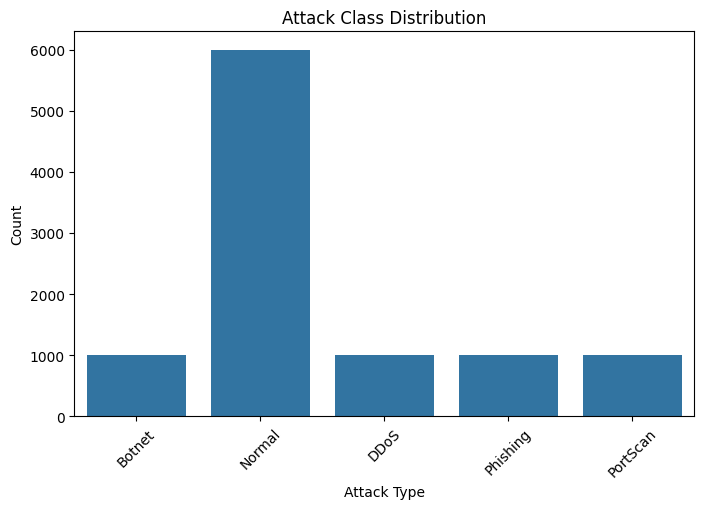

,attack_type
attack_type,
Botnet,1000
DDoS,1000
Normal,6000
Phishing,1000
PortScan,1000


In [ ]:
# Load the dataset
df = pd.read_excel('/content/cyber_attacks.xlsx')  # Change the filename if necessary

# Basic info
print("Dataset Shape:", df.shape)
df.head()

# Info on types & nulls
df.info()

# Missing values check
print("\nMissing values:\n", df.isnull().sum())

# Class distribution (target variable)
plt.figure(figsize=(8, 5))
sns.countplot(x='attack_type', data=df)
plt.title("Attack Class Distribution")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Statistical summary
df.describe()

# Group by 'attack_type' and count the occurrences
attack_counts = df.groupby('attack_type')['attack_type'].count()

# Display the results
display(attack_counts)


## **2. Perform data preprocessing.**


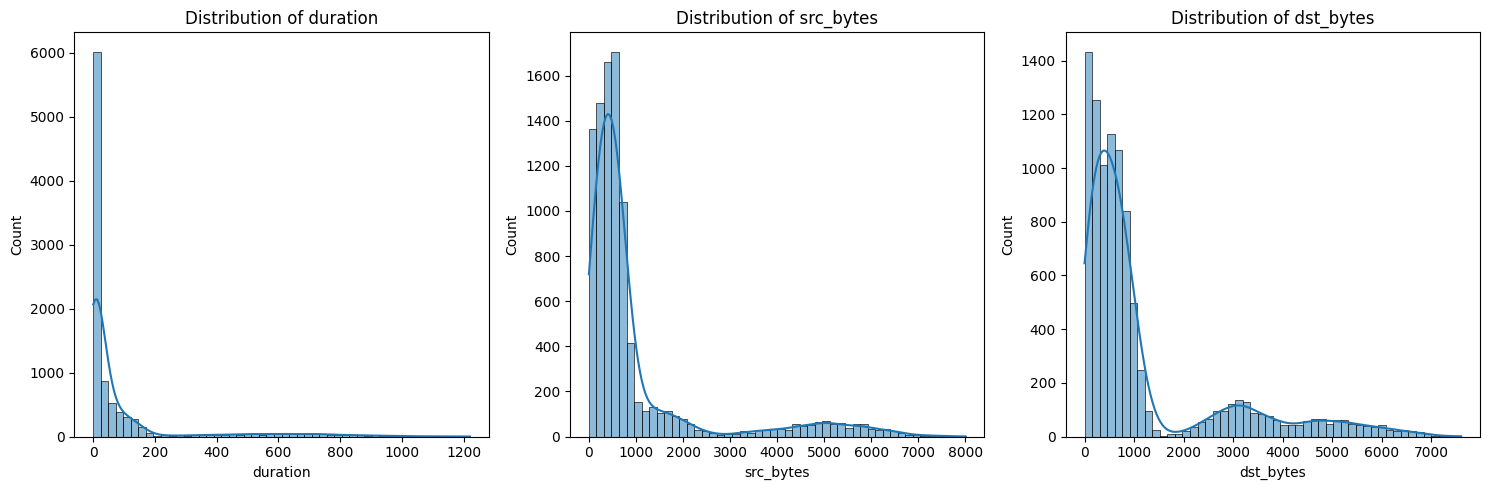

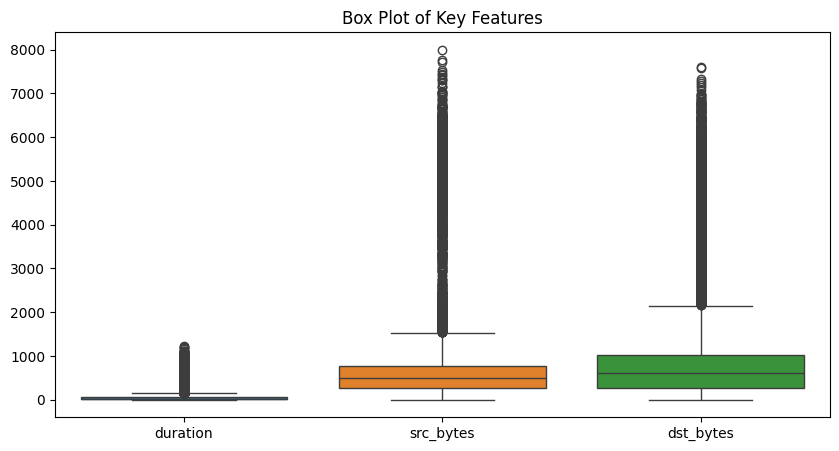

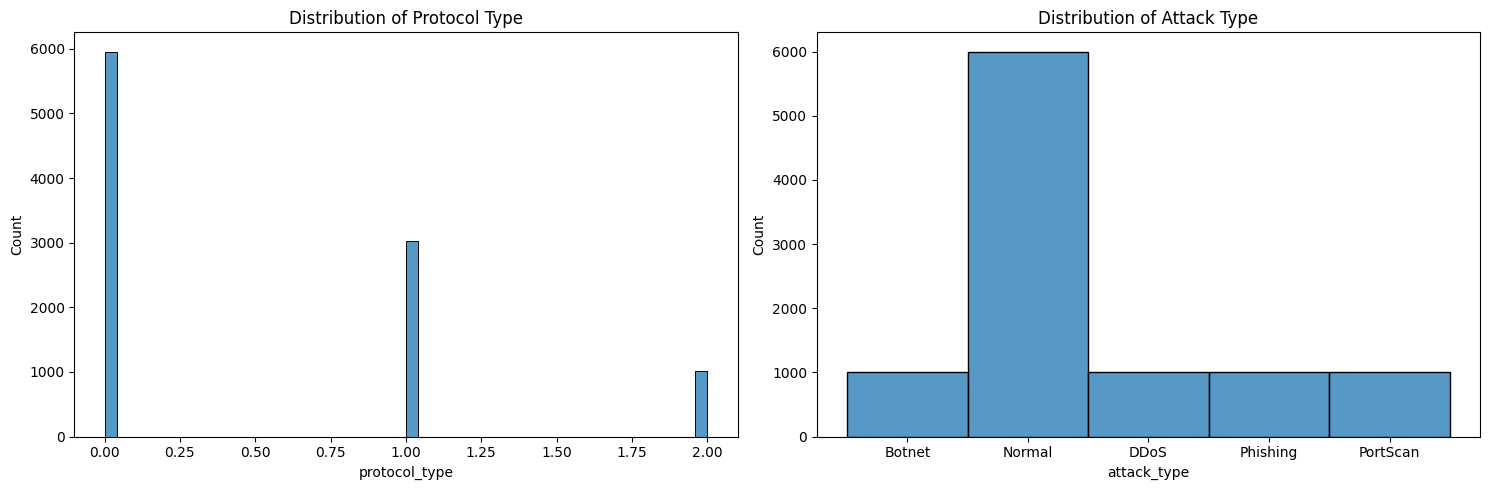

Remaining missing values after imputation:
 protocol_type      0
duration           0
src_bytes          0
dst_bytes          0
num_packets        0
num_connections    0
attack_type        0
dtype: int64


,protocol_type,duration,src_bytes,dst_bytes,num_packets,num_connections,attack_type
0,1,43.418651,1701.411601,201.794741,42,15,0
1,1,8.587924,409.971403,710.745376,17,6,2
2,1,4.386891,418.478693,559.457816,17,5,2
3,0,84.035480,980.541438,1189.719031,11,3,2
4,0,1.061892,494.253699,572.459614,11,3,2


Label Mapping:
 {0: 'Botnet', 1: 'DDoS', 2: 'Normal', 3: 'Phishing', 4: 'PortScan'}


In [ ]:
# --- Import Visualization Libraries ---

# --- Visualize distributions for numerical features ---
features = ['duration', 'src_bytes', 'dst_bytes']
plt.figure(figsize=(15, 5))

for i, col in enumerate(features, 1):
    plt.subplot(1, len(features), i)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# --- Detect outliers using boxplot ---
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['duration', 'src_bytes', 'dst_bytes']])
plt.title('Box Plot of Key Features')
plt.show()

# --- Visualize categorical columns ---
plt.figure(figsize=(15, 5))

# Protocol type distribution
plt.subplot(1, 2, 1)
sns.histplot(df['protocol_type'], bins=50)
plt.title('Distribution of Protocol Type')

# Attack type distribution
plt.subplot(1, 2, 2)
sns.histplot(df['attack_type'], bins=50)
plt.title('Distribution of Attack Type')

plt.tight_layout()
plt.show()

# --- Handle Missing Values ---

# Create an imputer object for numerical columns
imputer = SimpleImputer(strategy='mean')

# Impute missing values in numeric columns
num_cols = ['duration', 'src_bytes', 'dst_bytes']
df[num_cols] = imputer.fit_transform(df[num_cols])

# Confirm no missing values left
print("Remaining missing values after imputation:\n", df.isnull().sum())

# --- Encode Categorical Labels ---

# Initialize LabelEncoder
enc = LabelEncoder()

# Apply LabelEncoder to the target column
df['attack_type'] = enc.fit_transform(df['attack_type'])

# Display the first few rows of the processed data
display(df.head())

# --- Save label mapping for decoding predictions later ---
label_mapping = {index: class_label for index, class_label in enumerate(enc.classes_)}
print("Label Mapping:\n", label_mapping)


## **3. Train a Random Forest Classifier using the preprocessed data to train the model.**


In [ ]:
# For reproducibility
RANDOM_STATE = 11

# X (features), y (target)
X = df.drop(columns=['attack_type'])
y = df['attack_type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=RANDOM_STATE
)

# Combine X_train and y_train for resampling
train_data = pd.concat([X_train, y_train], axis=1)

# Separate classes
majority_class = train_data[train_data['attack_type'] == 2]
minority_classes = train_data[train_data['attack_type'] != 2]


### Baseline


⚙️ Training Baseline Random Forest Model...

🚀 Training Random Forest (Baseline)...


,precision,recall,f1-score,support
0,1.000000,0.996667,0.998331,300.000000
1,1.000000,1.000000,1.000000,300.000000
2,0.999445,1.000000,0.999722,1800.000000
3,1.000000,1.000000,1.000000,300.000000
4,1.000000,1.000000,1.000000,300.000000
accuracy,0.999667,0.999667,0.999667,0.999667
macro avg,0.999889,0.999333,0.999611,3000.000000
weighted avg,0.999667,0.999667,0.999666,3000.000000



Balanced Accuracy Score (Baseline): 0.9993


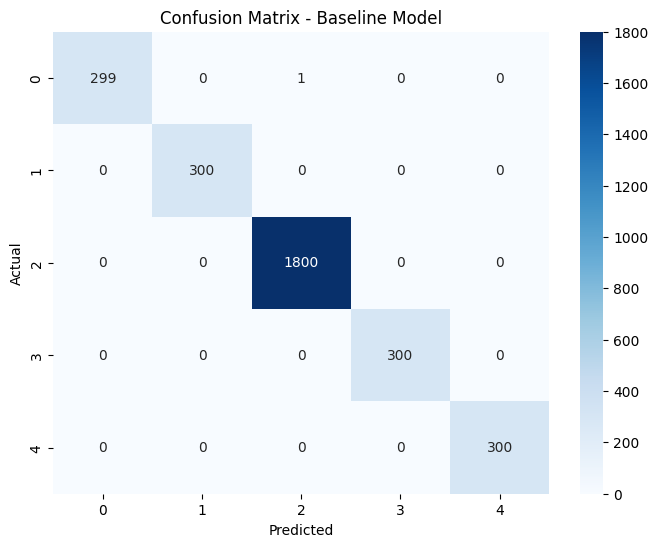

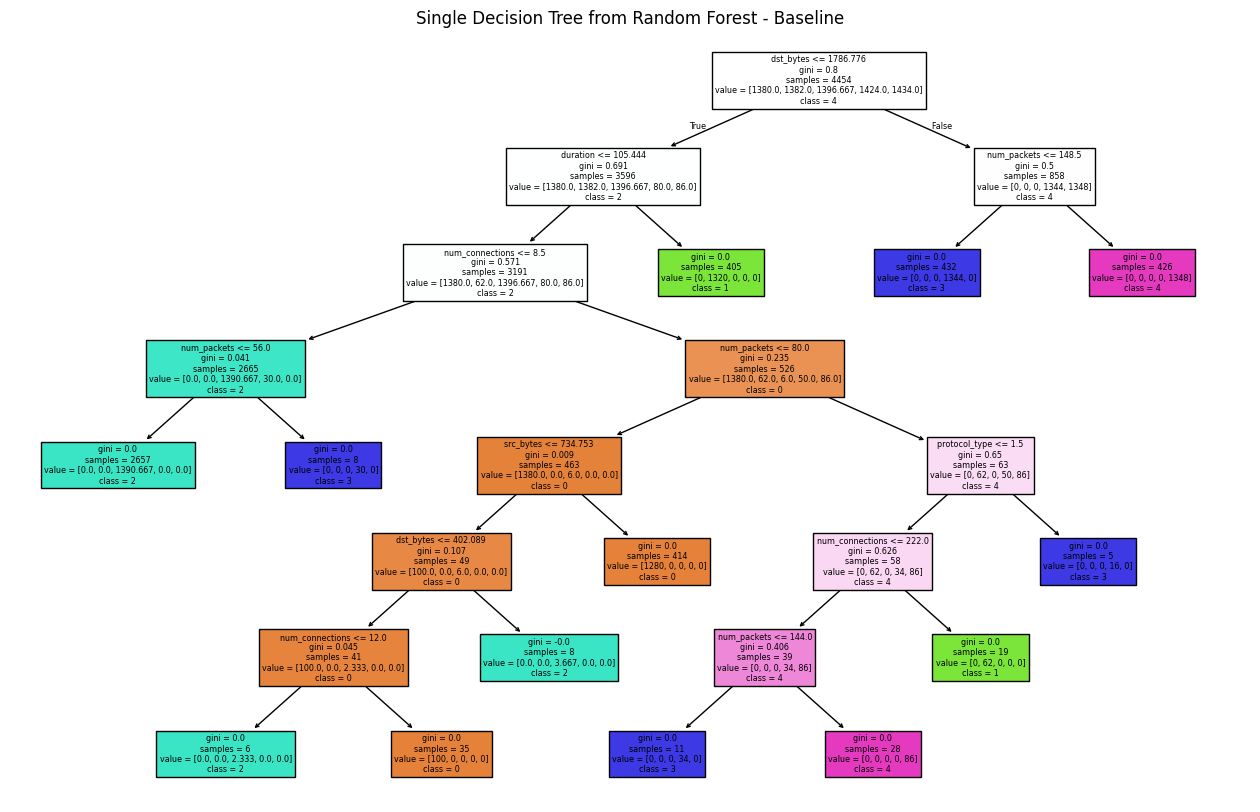

In [ ]:
# -----------------------------
# 1️⃣ Scenario 0: Baseline Model (No Resampling)
# -----------------------------
print("\n⚙️ Training Baseline Random Forest Model...")

# -----------------------------
# 2️⃣ Train RandomForest (Baseline)
# -----------------------------
print("\n🚀 Training Random Forest (Baseline)...")

# Baseline Pipeline (No Resampling)
clf_baseline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced',
        random_state=RANDOM_STATE,
        n_jobs=-1
    ))
])

# Fit the baseline model
clf_baseline.fit(X_train, y_train)

# Predict and evaluate
y_pred_baseline = clf_baseline.predict(X_test)

# Classification report
report = classification_report(y_test, y_pred_baseline, output_dict=True)
df_report = pd.DataFrame(report).transpose()
display(df_report)

# Balanced accuracy score
balanced_acc = balanced_accuracy_score(y_test, y_pred_baseline)
print(f"\nBalanced Accuracy Score (Baseline): {balanced_acc:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_baseline)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Baseline Model')
plt.show()

# Visualize one tree from the RandomForest
rf_classifier_baseline = clf_baseline.named_steps['classifier']
estimator_baseline = rf_classifier_baseline.estimators_[0]

plt.figure(figsize=(16, 10))
plot_tree(
    estimator_baseline,
    feature_names=X.columns,
    class_names=[str(label) for label in np.unique(y)],
    filled=True
)
plt.title('Single Decision Tree from Random Forest - Baseline')
plt.show()


### Oversampling


⚙️ Performing Oversampling...

🚀 Training Random Forest (Oversampling)...


,precision,recall,f1-score,support
0,0.931677,1.000000,0.964630,300.000000
1,1.000000,1.000000,1.000000,300.000000
2,1.000000,0.999444,0.999722,1800.000000
3,1.000000,0.930000,0.963731,300.000000
4,1.000000,1.000000,1.000000,300.000000
accuracy,0.992667,0.992667,0.992667,0.992667
macro avg,0.986335,0.985889,0.985617,3000.000000
weighted avg,0.993168,0.992667,0.992669,3000.000000



Balanced Accuracy Score (Oversampling): 0.9859


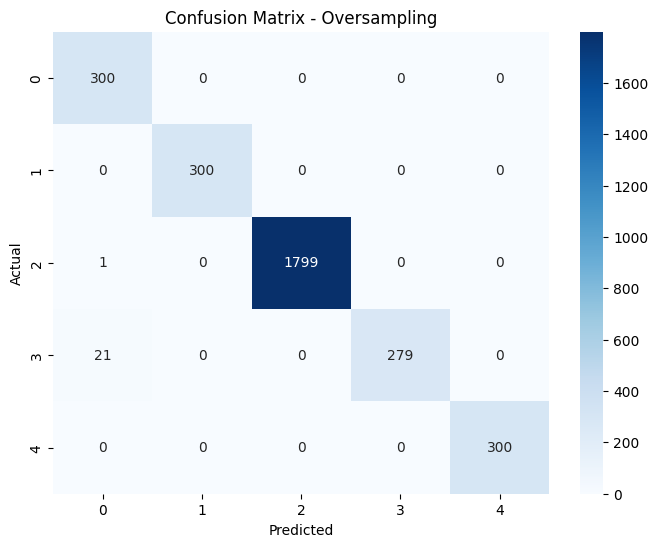

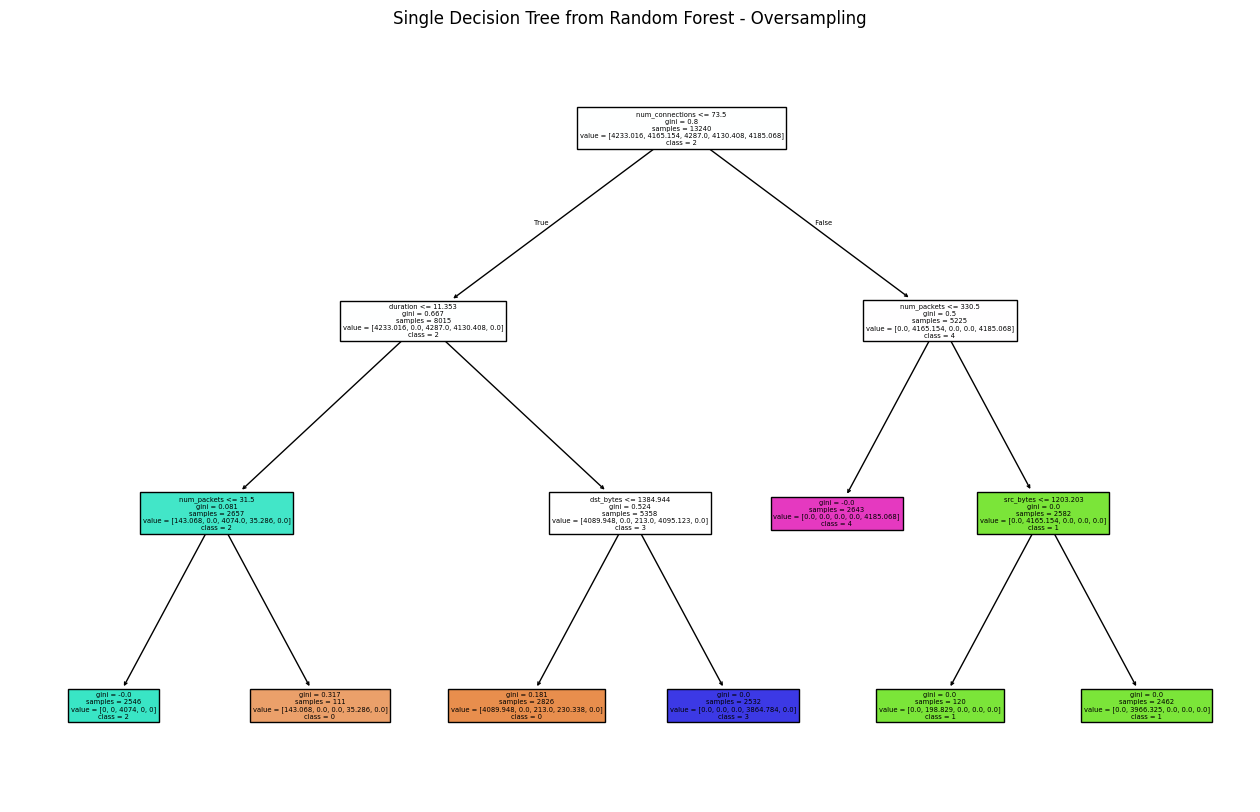

In [ ]:
# -----------------------------
# 2️⃣ Scenario 1: Oversampling
# -----------------------------
print("\n⚙️ Performing Oversampling...")

# Upsample minority classes
minority_upsampled = resample(
    minority_classes,
    replace=True,
    n_samples=len(majority_class) * 4,  # Increase minority samples
    random_state=RANDOM_STATE
)

# Combine majority and upsampled minority classes
balanced_data = pd.concat([majority_class, minority_upsampled])

# Shuffle
balanced_data = balanced_data.sample(frac=1, random_state=RANDOM_STATE).reset_index(drop=True)

# Resampled features and labels
X_train_resampled = balanced_data.drop(columns=['attack_type'])
y_train_resampled = balanced_data['attack_type']

# -----------------------------
# 3️⃣ Train RandomForest (Oversampling)
# -----------------------------
print("\n🚀 Training Random Forest (Oversampling)...")

clf_oversample = make_pipeline(
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=3, class_weight='balanced', random_state=30, max_depth=3)
)

clf_oversample.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred_oversample = clf_oversample.predict(X_test)

# Classification report
report = classification_report(y_test, y_pred_oversample, output_dict=True)
df_report = pd.DataFrame(report).transpose()
display(df_report)

# Balanced accuracy score
balanced_acc = balanced_accuracy_score(y_test, y_pred_oversample)
print(f"\nBalanced Accuracy Score (Oversampling): {balanced_acc:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_oversample)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Oversampling')
plt.show()

# Visualize one tree from the RandomForest
rf_classifier_os = clf_oversample.named_steps['randomforestclassifier']
estimator_os = rf_classifier_os.estimators_[0]

plt.figure(figsize=(16, 10))
plot_tree(
    estimator_os,
    feature_names=X.columns,
    class_names=[str(label) for label in np.unique(y)],
    filled=True
)
plt.title('Single Decision Tree from Random Forest - Oversampling')
plt.show()



### Downsampling


⚙️ Performing Downsampling...
Class distribution after downsampling:
attack_type
3    700
0    700
4    700
2    700
1    700
Name: count, dtype: int64

🚀 Training Random Forest (Downsampling)...


,precision,recall,f1-score,support
0,0.958333,0.996667,0.977124,300.000000
1,1.000000,1.000000,1.000000,300.000000
2,0.999445,1.000000,0.999722,1800.000000
3,1.000000,0.956667,0.977853,300.000000
4,1.000000,1.000000,1.000000,300.000000
accuracy,0.995333,0.995333,0.995333,0.995333
macro avg,0.991556,0.990667,0.990940,3000.000000
weighted avg,0.995500,0.995333,0.995331,3000.000000



Balanced Accuracy Score (Downsampling): 0.9907


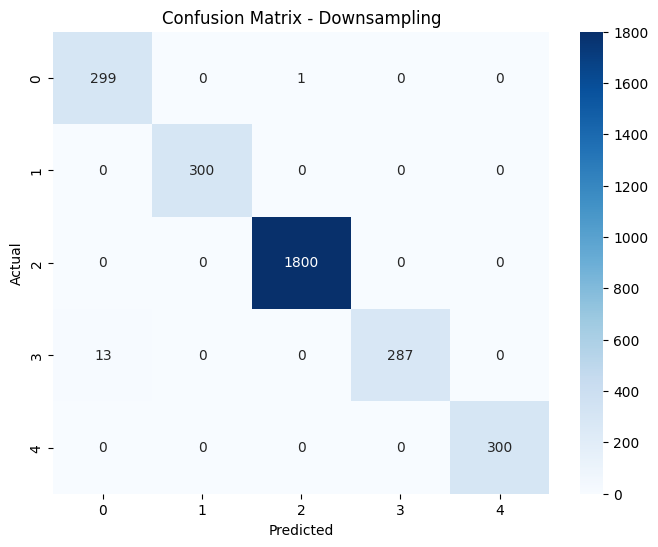

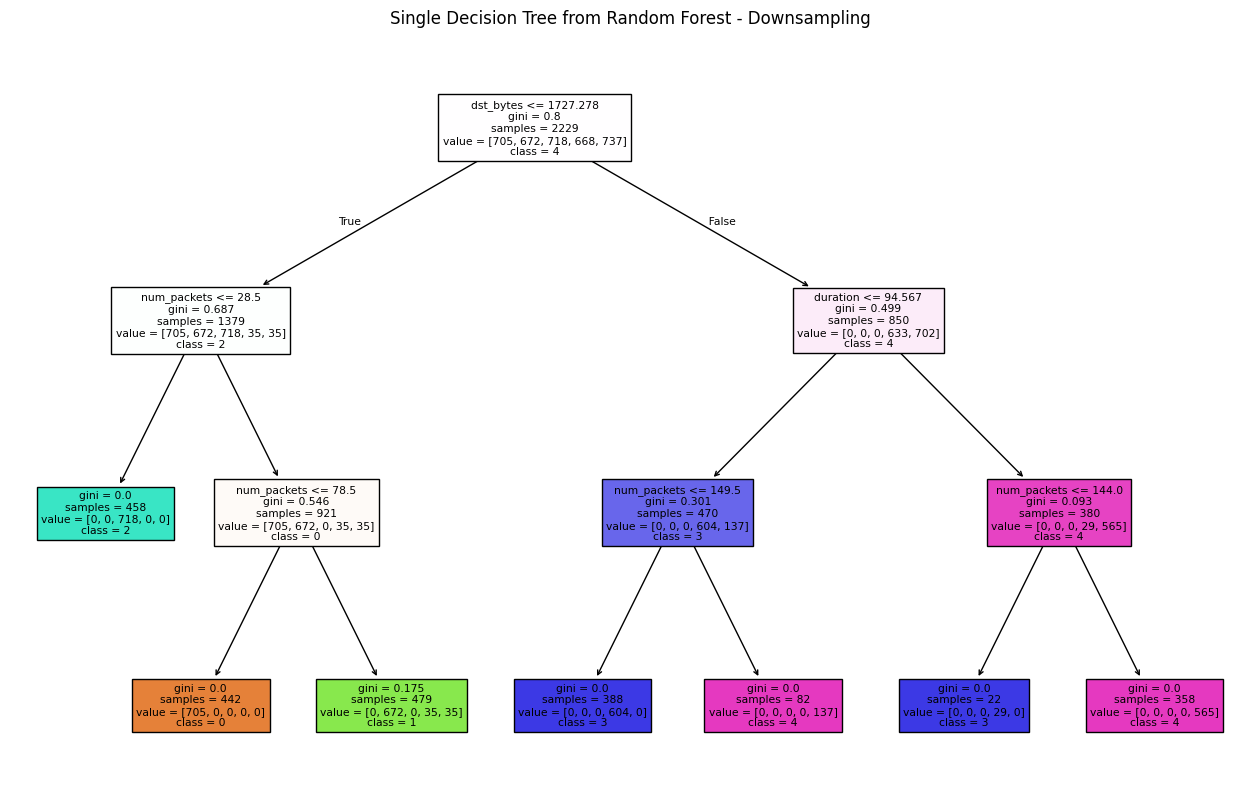

In [ ]:
# -----------------------------
# 4️⃣ Scenario 2: Downsampling
# -----------------------------
print("\n⚙️ Performing Downsampling...")

# Downsample majority class
majority_downsampled = resample(
    majority_class,
    replace=False,
    n_samples=len(minority_classes) // 4,
    random_state=42
)

# Combine downsampled majority and minority classes
balanced_data_ds = pd.concat([majority_downsampled, minority_classes])

# Shuffle
balanced_data_ds = balanced_data_ds.sample(frac=1, random_state=42).reset_index(drop=True)

# Resampled features and labels
X_train_resampled_ds = balanced_data_ds.drop(columns=['attack_type'])
y_train_resampled_ds = balanced_data_ds['attack_type']

print("Class distribution after downsampling:")
print(y_train_resampled_ds.value_counts())

# -----------------------------
# 5️⃣ Train RandomForest (Downsampling)
# -----------------------------
print("\n🚀 Training Random Forest (Downsampling)...")

clf_downsample = make_pipeline(
    SimpleImputer(strategy='median'),
    RandomForestClassifier(class_weight='balanced', random_state=42, max_depth=3)
)

clf_downsample.fit(X_train_resampled_ds, y_train_resampled_ds)

# Predict and evaluate
y_pred_downsample = clf_downsample.predict(X_test)

# Classification report
report_ds = classification_report(y_test, y_pred_downsample, output_dict=True)
df_report_ds = pd.DataFrame(report_ds).transpose()
display(df_report_ds)

# Balanced accuracy score
balanced_acc_ds = balanced_accuracy_score(y_test, y_pred_downsample)
print(f"\nBalanced Accuracy Score (Downsampling): {balanced_acc_ds:.4f}")

# Confusion matrix
cm_ds = confusion_matrix(y_test, y_pred_downsample)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ds, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Downsampling')
plt.show()

# Visualize one tree from RandomForest (Downsampling)
rf_classifier_ds = clf_downsample.named_steps['randomforestclassifier']
estimator_ds = rf_classifier_ds.estimators_[0]

plt.figure(figsize=(16, 10))
plot_tree(
    estimator_ds,
    feature_names=X.columns,
    class_names=[str(label) for label in np.unique(y)],
    filled=True
)
plt.title('Single Decision Tree from Random Forest - Downsampling')
plt.show()


### Hyperparameter Tuning

Fitting 3 folds for each of 10 candidates, totalling 30 fits

✅ Best Parameters:
{'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 10, 'classifier__class_weight': 'balanced'}
✅ Best Balanced Accuracy (CV): 1.0000

✅ Classification Report on Test Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       300
           2       1.00      1.00      1.00      1800
           3       1.00      1.00      1.00       300
           4       1.00      1.00      1.00       300

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

✅ Balanced Accuracy Score on Test Set: 0.9993


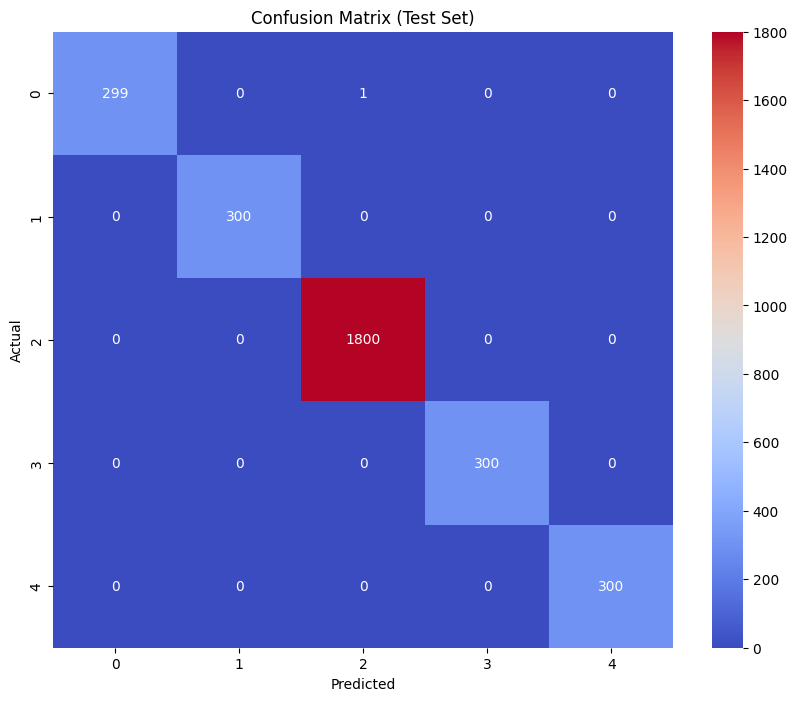

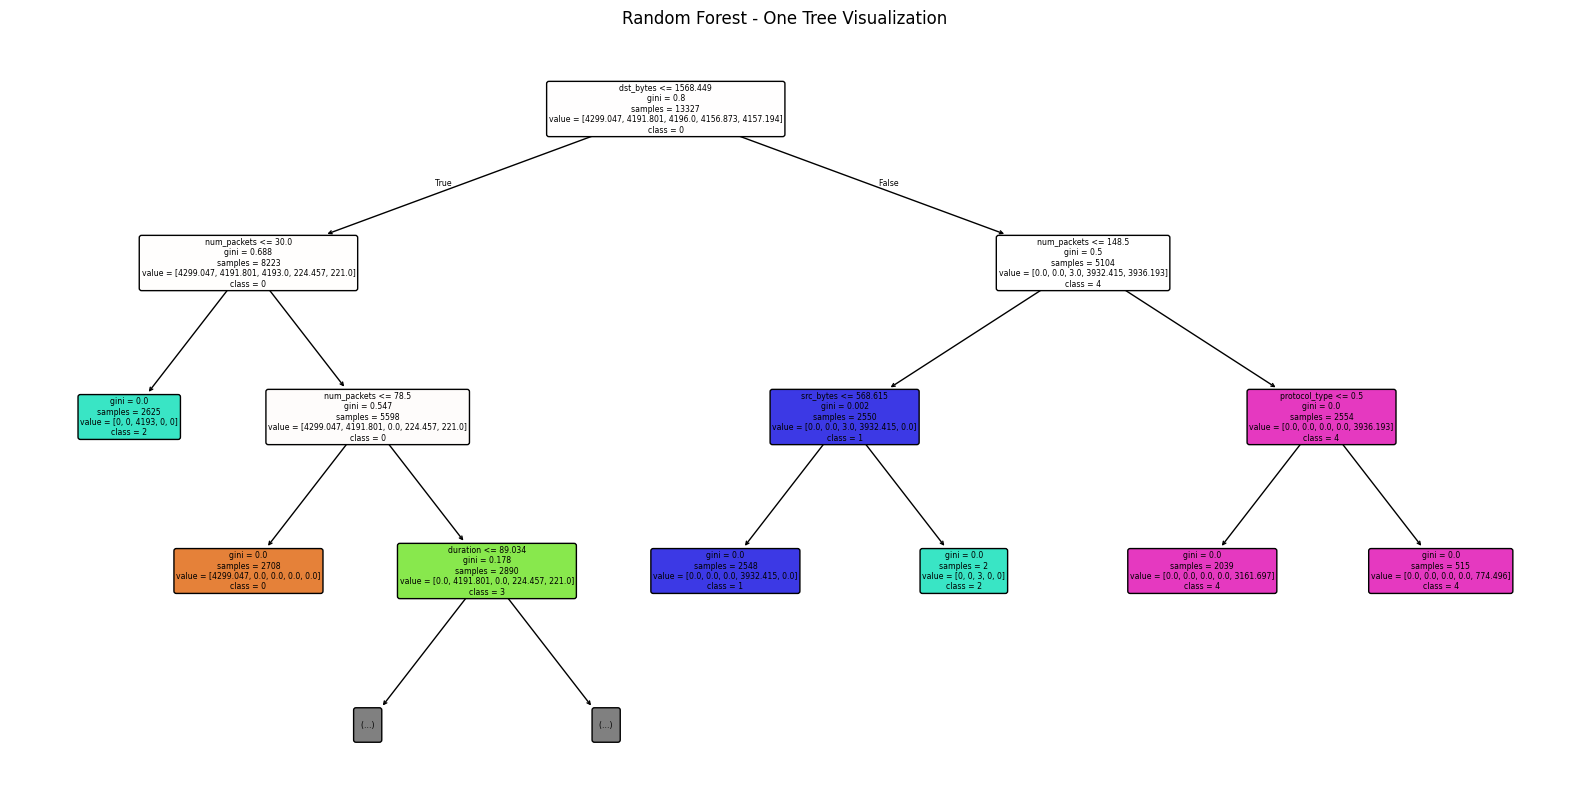

🎉 Faster hyperparameter tuning and evaluation complete!


In [ ]:


# ✅ 1. Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# ✅ 2. Reduced hyperparameter search space for speed
param_distributions = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 10, None],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__max_features': ['sqrt'],
    'classifier__class_weight': ['balanced']
}

# ✅ 3. Cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # reduced to 3 folds for speed

# ✅ 4. RandomizedSearchCV setup (faster alternative)
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=10,                      # Try 10 random combinations (fast!)
    scoring='balanced_accuracy',
    cv=cv_strategy,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# ✅ 5. Run RandomizedSearchCV on oversampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# ✅ 6. Best hyperparameters and score
print(f"\n✅ Best Parameters:\n{random_search.best_params_}")
print(f"✅ Best Balanced Accuracy (CV): {random_search.best_score_:.4f}\n")

# ✅ 7. Evaluate best estimator on test data
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)

print("✅ Classification Report on Test Set:\n")
print(classification_report(y_test, y_pred))

print(f"✅ Balanced Accuracy Score on Test Set: {balanced_accuracy_score(y_test, y_pred):.4f}")

# ✅ 8. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ✅ 10. Plot One Decision Tree (Optional)
plt.figure(figsize=(20, 10))
plot_tree(
    rf_classifier.estimators_[0],
    feature_names=feature_names,
    class_names=[str(cls) for cls in y_train.unique()],
    filled=True,
    rounded=True,
    max_depth=3
)
plt.title("Random Forest - One Tree Visualization")
plt.show()

print("🎉 Faster hyperparameter tuning and evaluation complete!")


## **4. Perform feature importance analysis.**

### Baseline


Top 10 Features (Baseline):
           Feature  Importance
4      num_packets    0.355739
5  num_connections    0.292466
1         duration    0.147144
3        dst_bytes    0.117685
2        src_bytes    0.086524
0    protocol_type    0.000442


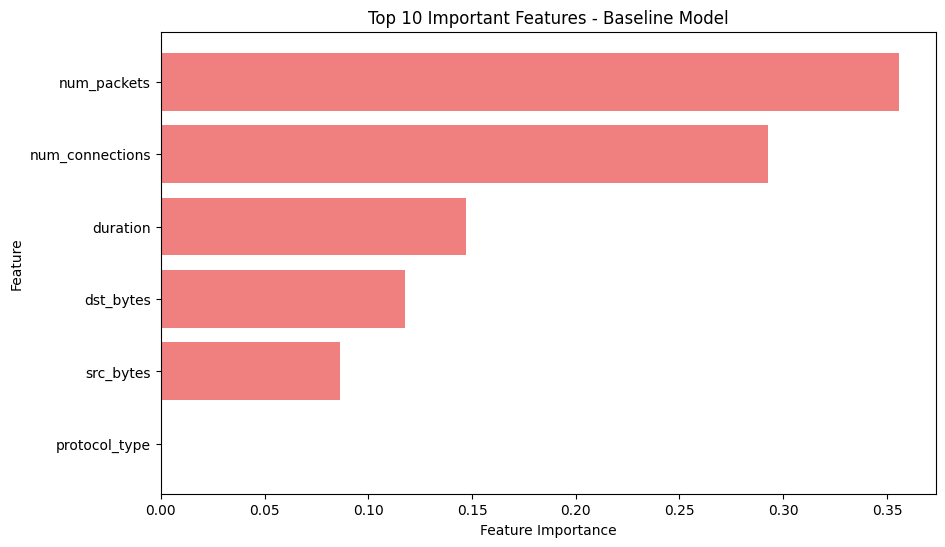

🎉 Baseline model evaluation complete!


In [ ]:
# 6. Feature Importance
rf_classifier_baseline = baseline_pipeline.named_steps['classifier']

# Extract and sort feature importances
feature_importances_baseline = rf_classifier_baseline.feature_importances_

feature_importance_df_baseline = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_baseline
}).sort_values(by='Importance', ascending=False)

# Display top 10 features
print("\nTop 10 Features (Baseline):")
print(feature_importance_df_baseline.head(10))

# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_baseline['Feature'][:10],
         feature_importance_df_baseline['Importance'][:10],
         color='lightcoral')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features - Baseline Model')
plt.gca().invert_yaxis()
plt.show()

print("🎉 Baseline model evaluation complete!")


### Oversampling



Top 10 Features (Oversampling):
           Feature  Importance
3        dst_bytes    0.380107
4      num_packets    0.242421
5  num_connections    0.176952
2        src_bytes    0.110332
1         duration    0.090187
0    protocol_type    0.000000


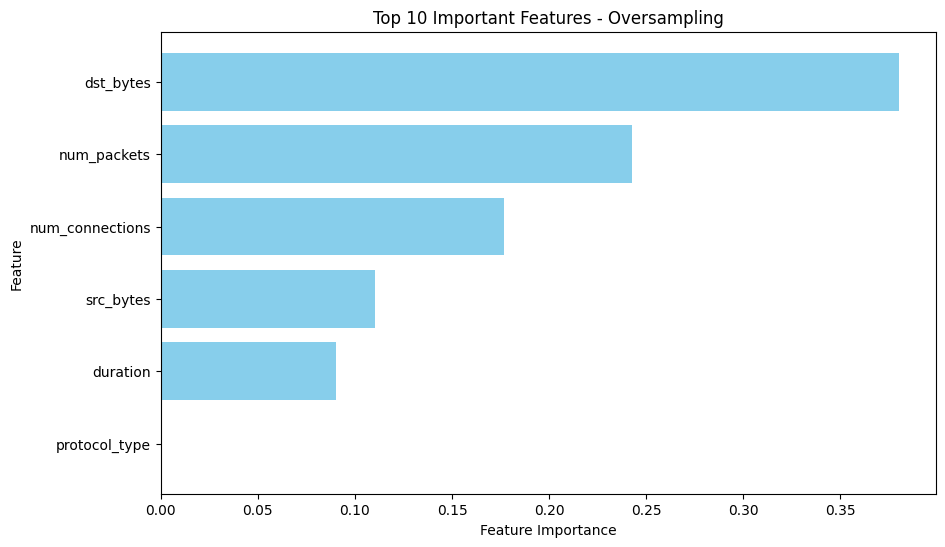

In [ ]:
# Feature importance (oversampling)
feature_importances_os = rf_classifier_os.feature_importances_

feature_importance_df_os = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_os
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Features (Oversampling):")
print(feature_importance_df_os.head(10))

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_os['Feature'][:10], feature_importance_df_os['Importance'][:10], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features - Oversampling')
plt.gca().invert_yaxis()
plt.show()


### Downsampling


Top 10 Features (Downsampling):
           Feature  Importance
4      num_packets    0.365741
5  num_connections    0.257583
3        dst_bytes    0.148743
1         duration    0.143508
2        src_bytes    0.084415
0    protocol_type    0.000010


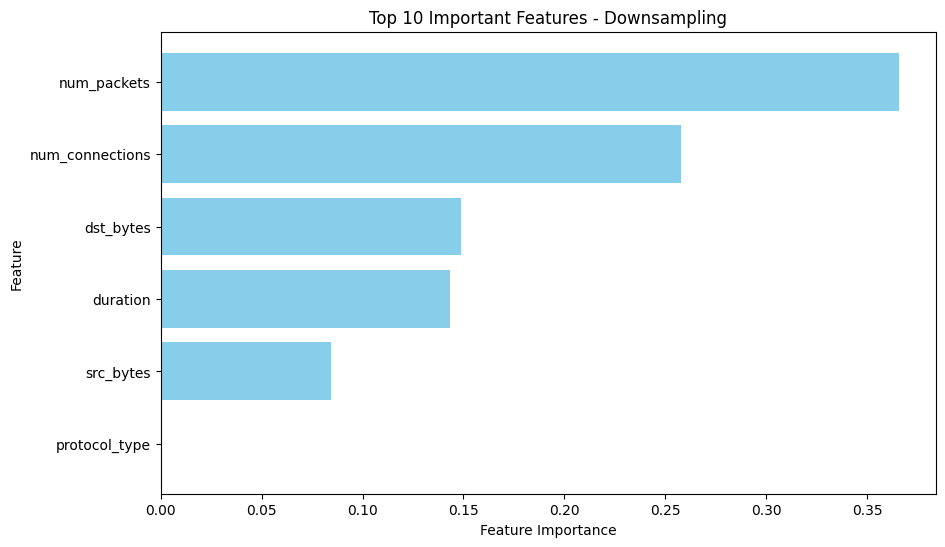

In [ ]:
# Feature importance (downsampling)
feature_importances_ds = rf_classifier_ds.feature_importances_

feature_importance_df_ds = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_ds
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Features (Downsampling):")
print(feature_importance_df_ds.head(10))

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_ds['Feature'][:10], feature_importance_df_ds['Importance'][:10], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features - Downsampling')
plt.gca().invert_yaxis()
plt.show()

### Hyperparameter Tuning


Top 10 Features (Hyperparameter Tuning):
           Feature  Importance
4      num_packets    0.364108
5  num_connections    0.262032
3        dst_bytes    0.170296
1         duration    0.113809
2        src_bytes    0.089089
0    protocol_type    0.000667


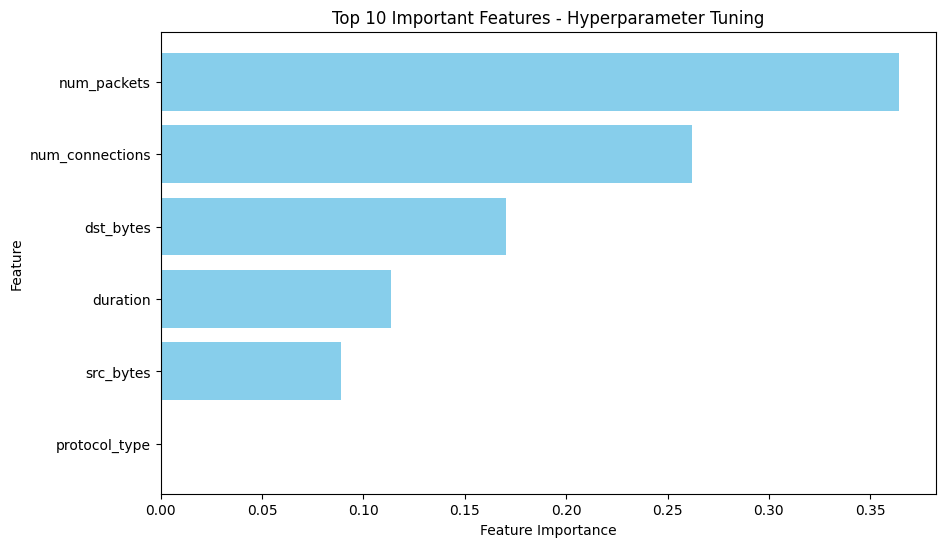

In [ ]:
# ✅ Extract the classifier from the best pipeline
rf_classifier_tuned = best_model.named_steps['classifier']

# ✅ Get feature importances
feature_importances_tuned = rf_classifier_tuned.feature_importances_

# ✅ Create a DataFrame for feature importances
feature_importance_df_tuned = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_tuned
}).sort_values(by='Importance', ascending=False)

# ✅ Print Top 10 Features
print("\nTop 10 Features (Hyperparameter Tuning):")
print(feature_importance_df_tuned.head(10))

# ✅ Plot Top 10 Features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_tuned['Feature'][:10], feature_importance_df_tuned['Importance'][:10], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features - Hyperparameter Tuning')
plt.gca().invert_yaxis()
plt.show()


## **5. Evaluate the model performance and report precision, recall, and F1-score.**

✅ Balanced Accuracy Score: 0.9993



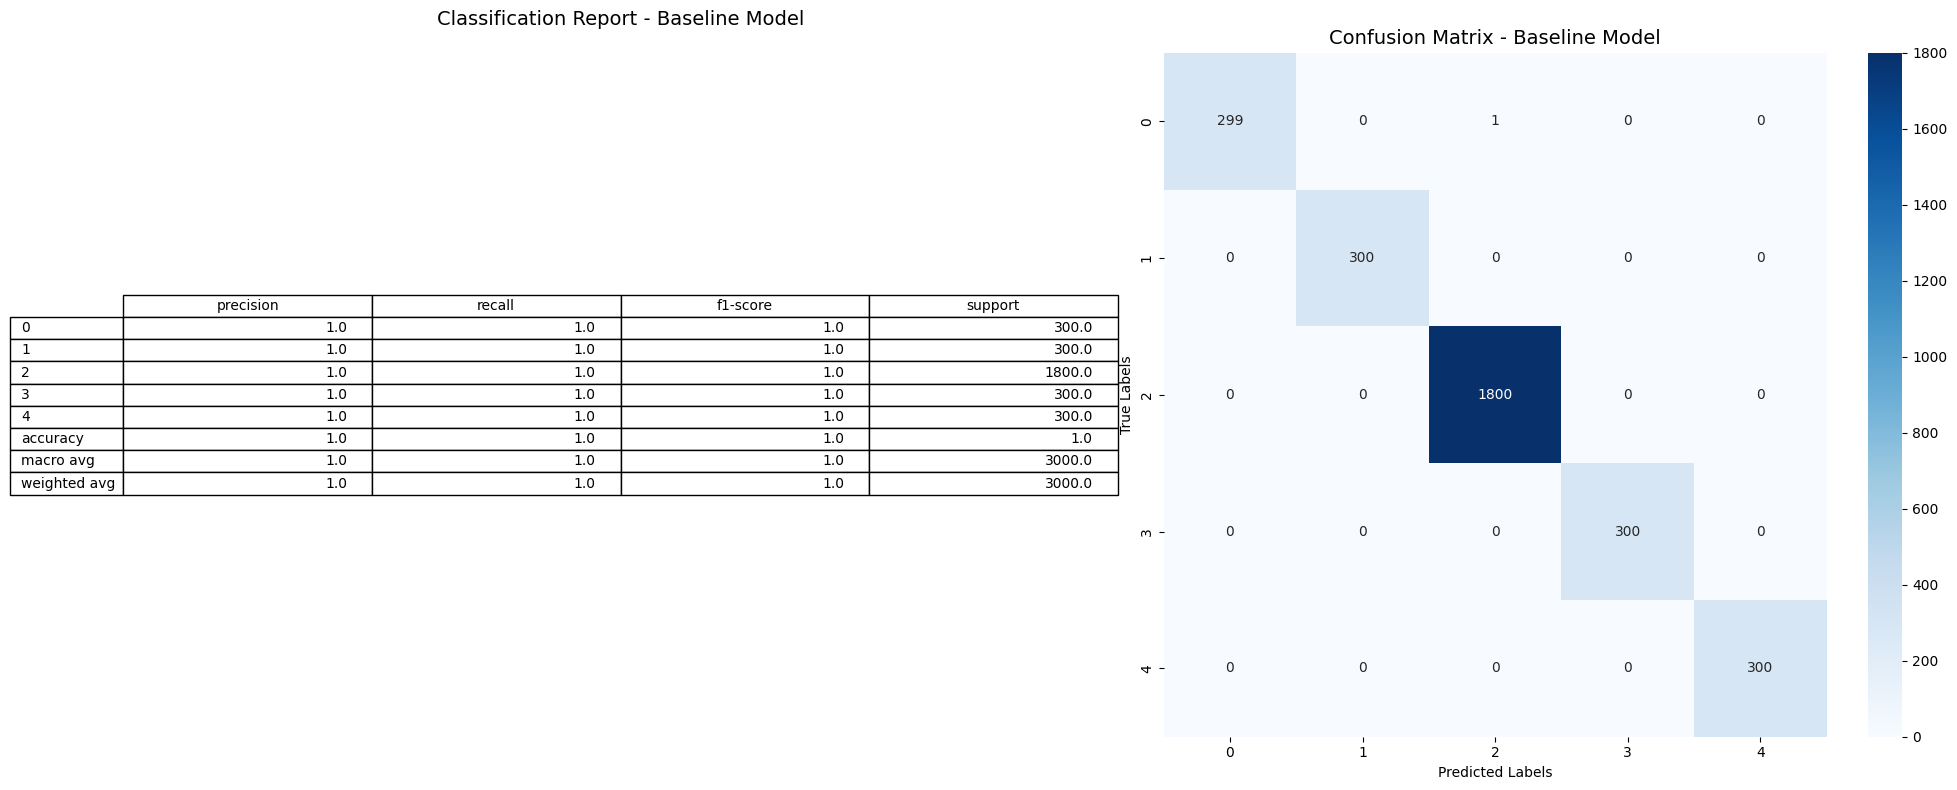

✅ Balanced Accuracy Score: 0.9859



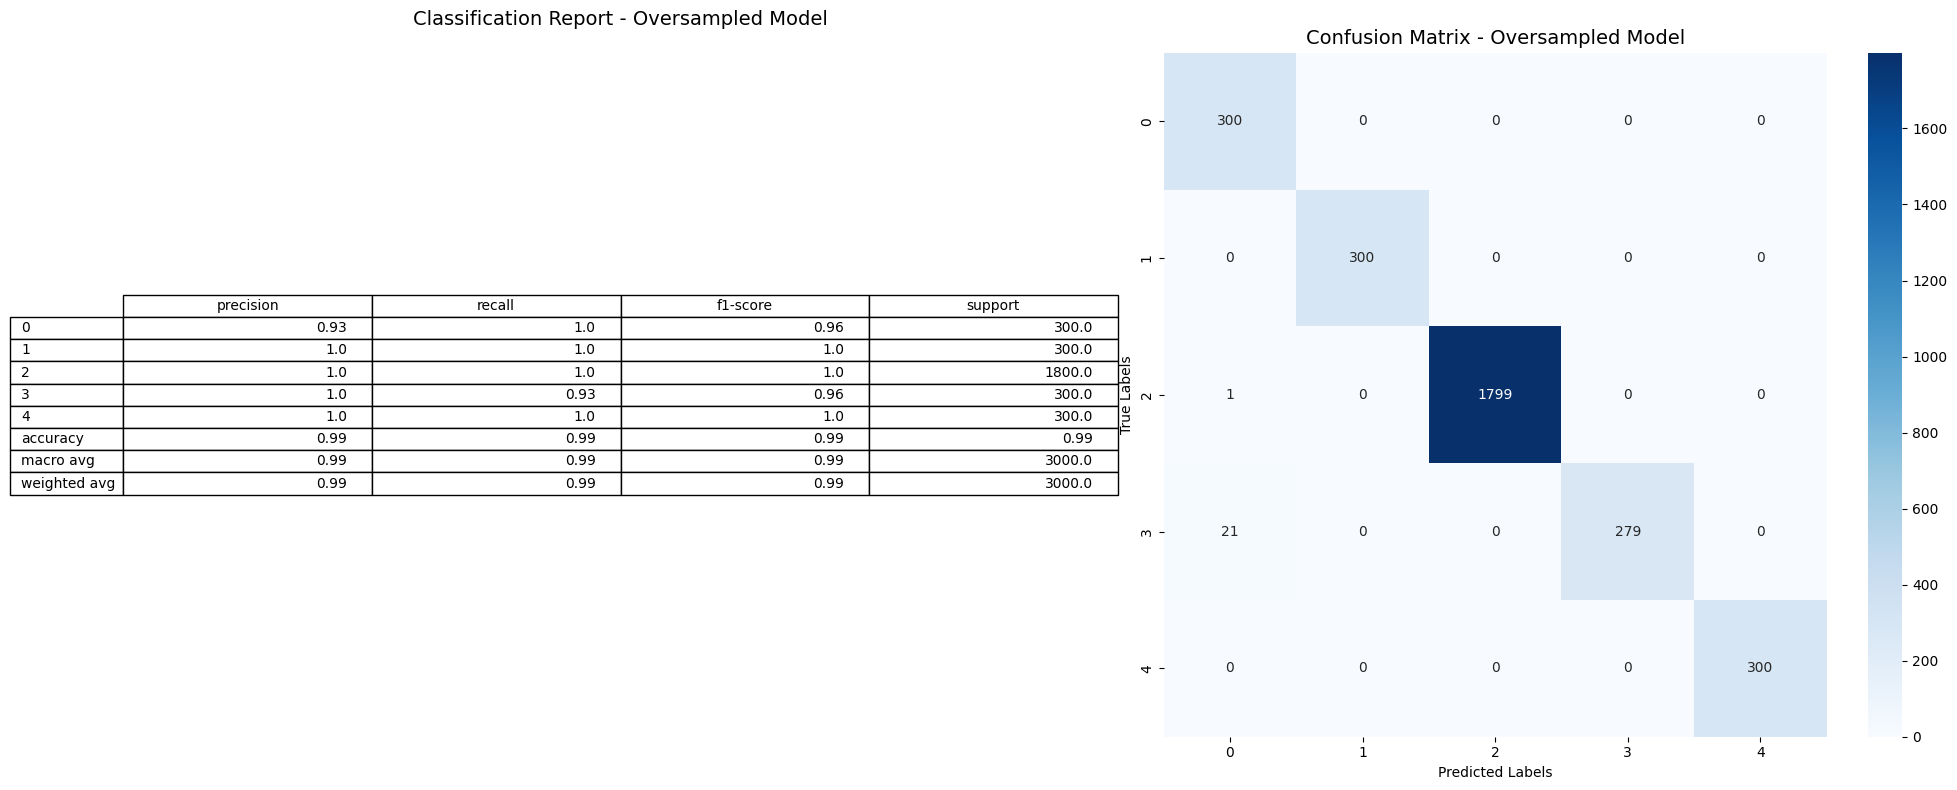

✅ Balanced Accuracy Score: 0.9907



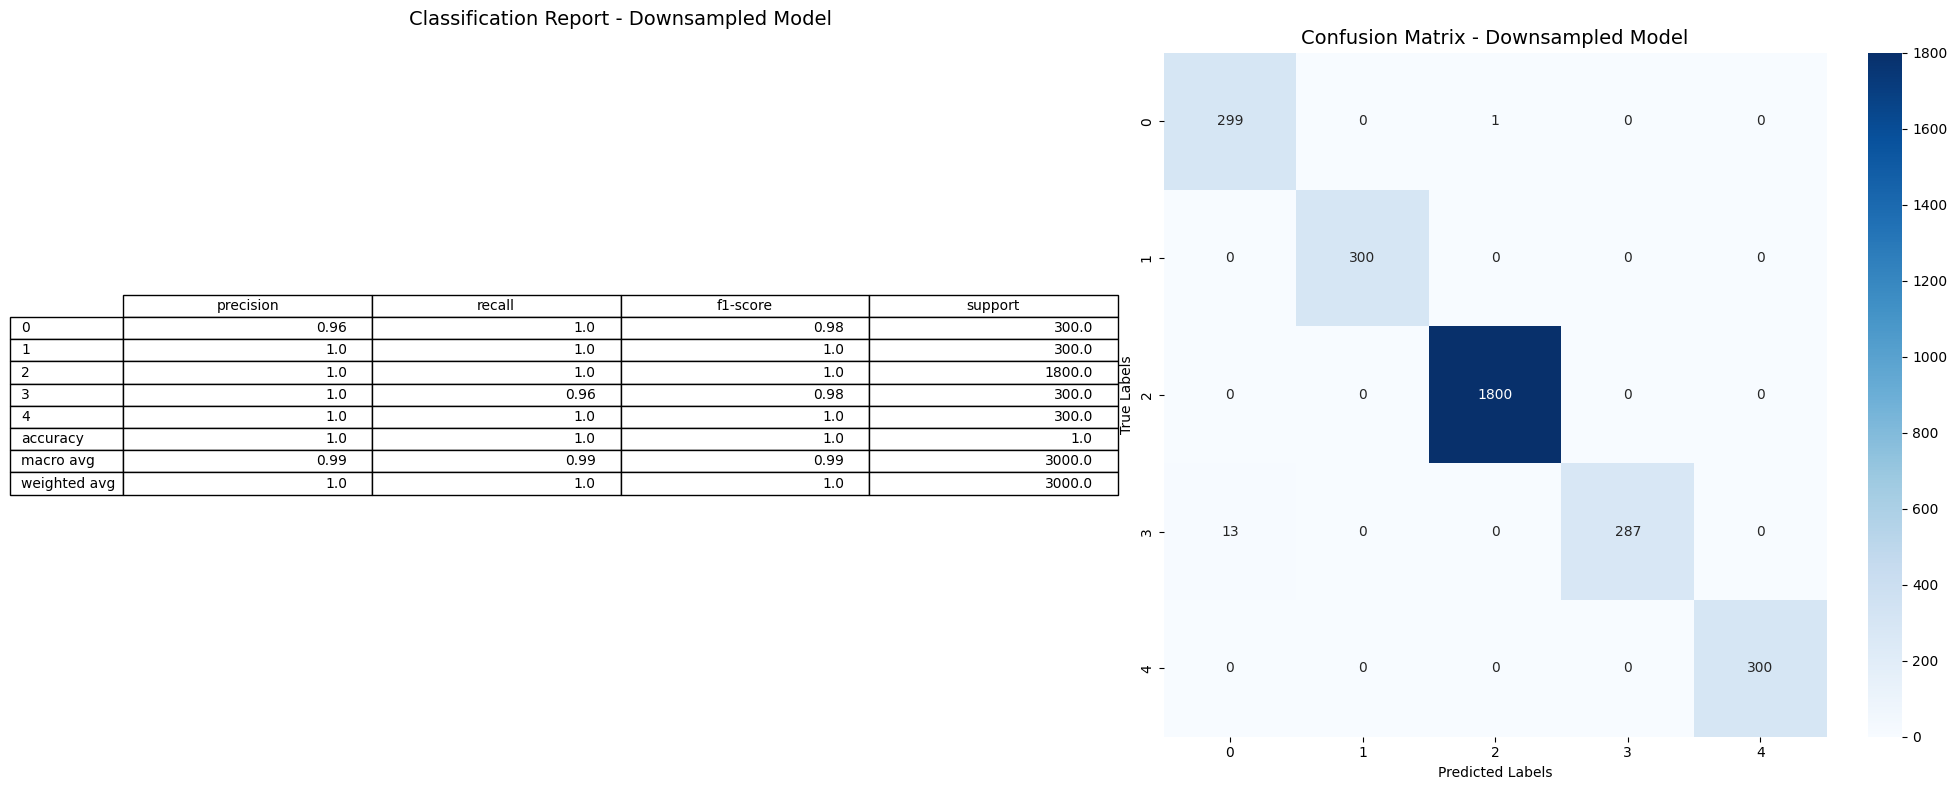

✅ Balanced Accuracy Score: 0.9993



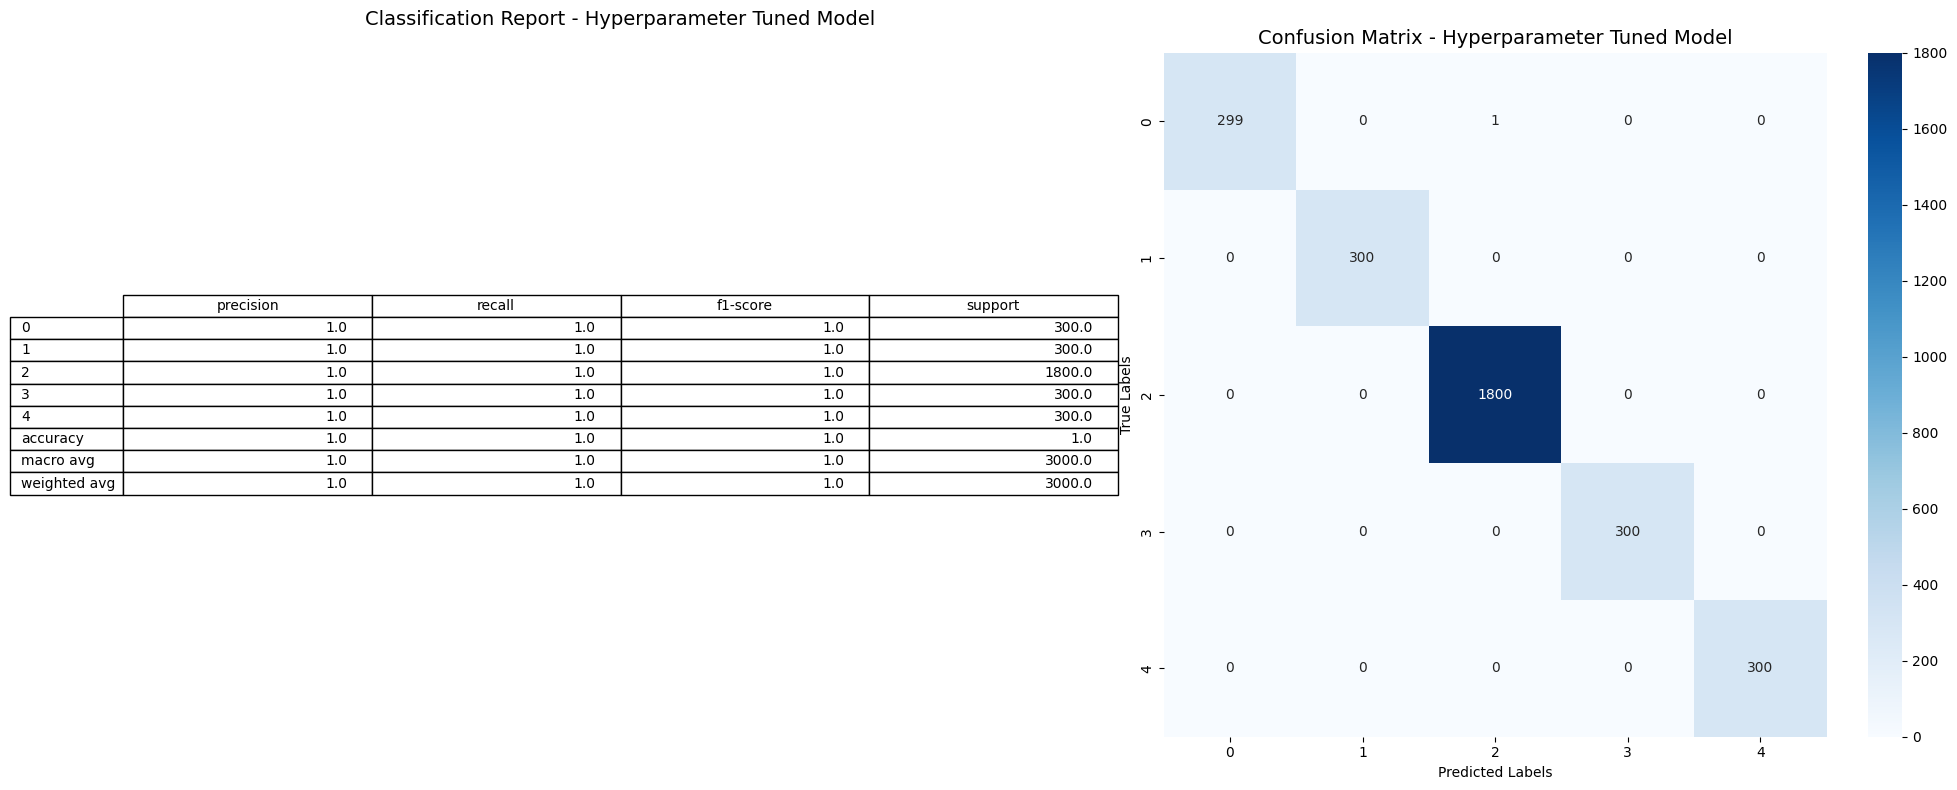

📈 Model Performance Comparison:



,Model,Precision (Macro),Recall (Macro),F1-score (Macro),Balanced Accuracy
0,Baseline Model,0.999889,0.999333,0.999611,0.999333
1,Oversampled Model,0.986335,0.985889,0.985617,0.985889
2,Downsampled Model,0.991556,0.990667,0.990940,0.990667
3,Hyperparameter Tuned Model,0.999889,0.999333,0.999611,0.999333


In [ ]:

# ✅ Store models in a dictionary for easy iteration
models = {
    "Baseline Model": clf_baseline,
    "Oversampled Model": clf_oversample,
    "Downsampled Model": clf_downsample,
    "Hyperparameter Tuned Model": best_model
}

# ✅ Create a function to evaluate and display results (side-by-side layout)
def evaluate_model(name, model, X_test, y_test):

    # Predict on test set
    y_pred = model.predict(X_test)

    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()

    # Balanced accuracy
    balanced_acc = balanced_accuracy_score(y_test, y_pred)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print Scores
    print(f"✅ Balanced Accuracy Score: {balanced_acc:.4f}\n")

    # Create side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # 📋 Classification Report (Table)
    axes[0].axis('off')
    table = axes[0].table(cellText=np.round(report_df.values, 2),
                          colLabels=report_df.columns,
                          rowLabels=report_df.index,
                          loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    axes[0].set_title(f"Classification Report - {name}", fontsize=14, pad=20)

    # 🔷 Confusion Matrix (Heatmap)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=sorted(y_test.unique()),
                yticklabels=sorted(y_test.unique()),
                ax=axes[1])
    axes[1].set_title(f"Confusion Matrix - {name}", fontsize=14)
    axes[1].set_xlabel('Predicted Labels')
    axes[1].set_ylabel('True Labels')

    plt.tight_layout()
    plt.show()

    # Return report for summary table
    return {
        'Model': name,
        'Precision (Macro)': precision_score(y_test, y_pred, average='macro'),
        'Recall (Macro)': recall_score(y_test, y_pred, average='macro'),
        'F1-score (Macro)': f1_score(y_test, y_pred, average='macro'),
        'Balanced Accuracy': balanced_acc
    }

# ✅ Loop through each model and evaluate
results = []
for name, model in models.items():
    eval_result = evaluate_model(name, model, X_test, y_test)
    results.append(eval_result)

# ✅ Convert results to a DataFrame for comparison
results_df = pd.DataFrame(results)

# ✅ Display the comparison table
print("📈 Model Performance Comparison:\n")
display(results_df)


# **Guide Questions**

## **1. Preprocessing**

### How did you handle missing values in numerical features?

To handle missing values in numerical features, the SimpleImputer with the median strategy was used. This method replaces missing values with the median of the respective feature. The median was chosen over the mean because it is more resistant to extreme values or outliers, which is particularly useful when dealing with skewed data distributions. This ensures that the dataset remains representative and prevents distortions caused by unusually large or small values.

### Why is there a need to encode protocol_type feature, and which encoding method can be used?

The protocol_type feature represents different network protocols as categorical values, which machine learning models cannot process directly. Since these protocol types do not have a meaningful numerical order, encoding is necessary to convert them into a format that the model can interpret. One-hot encoding is the preferred approach because it creates a separate binary column for each unique protocol type, preventing the model from assuming any inherent ranking among categories. This ensures that the categorical data is properly represented without introducing bias in the learning process.

## **2. Model Training**

### How did you address class imbalance in the dataset?

Class imbalance occurs when some attack types have significantly fewer instances than others, which can cause the model to favor the majority class and perform poorly on minority classes. To address this, random oversampling was applied using the resample() function. This technique increases the number of instances in the minority class by duplicating existing samples until they are comparable in size to the majority class. Additionally, the class_weight="balanced" parameter was used in the model to adjust the learning process, ensuring that misclassifications of minority classes are penalized more than those of majority classes. This approach helps the model learn patterns from both dominant and rare attack types, improving overall classification performance.

### What hyperparameters of the Random Forest did you tune, and why?

The hyperparameters that were tuned include:

1. n_estimators: Determines the number of trees in the forest. Increasing this value can enhance model performance but at the cost of computational efficiency.

2. min_samples_split: Specifies the minimum number of samples required to split a node, helping control overfitting by preventing excessive depth in trees.

3. min_samples_leaf: Sets the minimum number of samples required at a leaf node, ensuring that small, insignificant splits are avoided.

4. bootstrap: Controls whether bootstrapping (sampling with replacement) is used when constructing trees, which influences variance reduction and overall stability.

5. Tuning these parameters was crucial for optimizing the balance between model complexity and generalization. The goal was to achieve high predictive accuracy without making the model overly complex, which could lead to overfitting.

### Why is a pipeline useful for this task?

A pipeline streamlines the entire machine learning workflow by integrating preprocessing steps, feature transformations, and model training into a single, structured process. This has several benefits:

1. It ensures consistency by applying the same transformations to both training and test data.

2. It minimizes the risk of data leakage by preventing improper handling of training data during preprocessing.

3. It simplifies the model deployment process since all steps are encapsulated in one object, allowing for easy reuse and modification.

By using a pipeline, the entire training and prediction process becomes more efficient and scalable, making it easier to maintain and update the model.

## **3. Evaluation**

### Why is accuracy alone insufficient to evaluate this model?

Accuracy is often misleading when dealing with imbalanced datasets because it does not account for class distribution. If a dataset contains 95% normal traffic and only 5% attack traffic, a model that always predicts "normal" will achieve 95% accuracy but fail to detect attacks effectively.

Instead, other metrics provide a more comprehensive evaluation:

1. Precision measures how many predicted attacks were actually correct.

2. Recall assesses how well the model identifies all attack instances.

3. F1-score balances precision and recall, making it useful for imbalanced data.

4. Balanced accuracy adjusts accuracy to consider class imbalance.

These metrics provide deeper insights into the model's strengths and weaknesses, ensuring it performs well across all categories.

### Which attack type was hardest to classify, and why might this be?

The Botnet attack was the most challenging to classify because it had the lowest scores in precision and F1-score. This difficulty arises due to several factors:

1. Limited instances: The dataset contained fewer Botnet attack samples, making it harder for the model to learn distinguishing patterns.

2. Feature similarity: Many Botnet attacks share characteristics with other network threats, leading to frequent misclassification.

3. Data imbalance: Since the model encounters this attack type less frequently during training, it struggles to recognize it in new data.

This highlights the importance of data augmentation, feature engineering, and model tuning to enhance classification performance for rare attack types.

### How would you improve the model’s performance on minority classes?

Several strategies can be applied to improve performance on underrepresented classes:

1. Data balancing techniques: Oversampling (as already done) can be combined with synthetic data generation methods like SMOTE (Synthetic Minority Over-sampling Technique).

2. Cost-sensitive learning: Assigning higher misclassification costs to minority classes through class_weight="balanced" ensures they receive more attention during training.

3. Feature engineering: Identifying additional distinguishing features could help the model better differentiate attack types.

4. Alternative models: Trying different machine learning algorithms, such as Gradient Boosting or Deep Learning models, may yield better results.

By implementing these improvements, the model can be made more effective at detecting rare attacks while maintaining overall accuracy.

## **4. Interpretation**

### Which features were most important for classification? Does this align with real-world attack patterns?

The most influential features in classification were num_packets and num_connections, which had the highest importance scores. These findings align with real-world cyberattack behaviors:

1. DDoS and port scanning attacks often generate an unusually high number of packets and connections as attackers flood a system with requests.

2. Other features, such as src_bytes and duration, also played a role but had less impact.

This indicates that network-based anomalies are strong indicators of malicious activity, reinforcing the model’s validity in real-world cybersecurity scenarios.



### How would you explain the model’s decision-making process to a non-technical team?

To make the model's decision-making process more understandable, visualization tools can be used:

1. Decision trees can visually demonstrate how different factors influence classification.

2. Feature importance plots show which attributes have the most impact on predictions.

3. Simple analogies: For example, just as a music recommendation system categorizes songs based on tempo and genre, the model categorizes network activity based on traffic patterns.

This approach ensures that even those without technical backgrounds can grasp the core concepts behind the model’s decisions.

## **5. Application**

### What steps would you take to deploy this model in a real-time network monitoring system?

To deploy the model in a real-time setting, the following steps would be taken:

1. Convert the trained model into an API using frameworks like Flask or FastAPI.

2. Integrate the API into a streaming framework that continuously analyzes network traffic.

3. Deploy the system on cloud or edge computing platforms for scalability and real-time processing.

4. Implement alert mechanisms to notify security teams when suspicious activity is detected.

These steps ensure the model functions efficiently in a live cybersecurity environment.

### How would you handle new attack types not present in the training data?

Since cyber threats continuously evolve, the model needs to adapt:

1. Regular updates: Continuously retrain the model with new attack datasets.

2. Anomaly detection: Use unsupervised learning to identify unusual patterns that may indicate new attacks.

3. Human oversight: Security professionals can verify and label new threats to improve future training.

By combining automated learning with human expertise, the system remains effective against emerging cybersecurity threats.

## **6. Summary**

### 1. Preprocessing
- **Handling Missing Values:**  
  - Used `SimpleImputer(strategy='median')` to replace missing values.  
  - Median was chosen to handle skewed data and outliers effectively.  

- **Encoding `protocol_type` Feature:**  
  - Needed encoding since it's a categorical variable.  
  - Used **one-hot encoding** to prevent the model from assuming an ordinal relationship between values.  

---

### 2. Model Training
- **Addressing Class Imbalance:**  
  - Used **random oversampling** to increase minority class instances.  
  - Applied `class_weight="balanced"` to adjust misclassification penalties.  

- **Random Forest Hyperparameter Tuning:**  
  - Tuned parameters:  
    - `n_estimators` (number of trees)  
    - `min_samples_split` (controls tree splitting)  
    - `min_samples_leaf` (prevents excessive splitting)  
    - `bootstrap` (influences variance reduction)  
  - Goal: Improve performance without overfitting.  

- **Pipeline Benefits:**  
  - Ensures consistent data preprocessing.  
  - Prevents data leakage.  
  - Simplifies model deployment and maintenance.  

---

### 3. Evaluation
- **Why Accuracy is Insufficient:**  
  - Accuracy can be misleading in imbalanced datasets.  
  - Alternative metrics: **Precision, Recall, F1-score, Balanced Accuracy** provide a better evaluation.  

- **Hardest Attack Type to Classify:**  
  - **`Botnet` attack** was the hardest due to:  
    - **Few instances** in the dataset.  
    - **Feature similarities** with other attack types.  
    - **Class imbalance** leading to poor recognition.  

- **Improving Performance on Minority Classes:**  
  - **Oversampling & SMOTE** to balance class distribution.  
  - **Cost-sensitive learning** using `class_weight="balanced"`.  
  - **Feature engineering** to improve distinction between attack types.  
  - **Trying alternative models** like Gradient Boosting or Deep Learning.  

---

### 4. Interpretation
- **Important Features for Classification:**  
  - `num_packets` and `num_connections` were the most significant.  
  - Aligns with real-world attack patterns (e.g., **DDoS & port scanning** involve high packet volumes).  

- **Explaining Model Decisions to a Non-Technical Team:**  
  - Use **decision trees** and **feature importance plots** for visualization.  
  - Explain with analogies (e.g., **music classification by genre** → attack classification by network activity).  

---

### 5. Application  
- **Deploying the Model in Real-Time Network Monitoring:**  
  - Convert the model into an **API** using Flask/FastAPI.  
  - Integrate with a **real-time streaming framework** for continuous monitoring.  
  - Deploy on **cloud or edge computing** for scalability.  
  - Implement **alert mechanisms** to notify security teams.  

- **Handling New Attack Types:**  
  - Periodically **update the model** with new attack data.  
  - Use **anomaly detection** to identify unknown attack patterns.  
  - Maintain **human oversight** to verify and improve threat detection.  

## **7. Key Insights**

1. Handling Missing Data Strategically Improves Model Robustness
   - Using **median imputation** helps mitigate the impact of skewed data and outliers, ensuring a more stable dataset for training.  

2. Class Imbalance Must Be Addressed for Fair Model Performance  
   - **Oversampling, cost-sensitive learning, and alternative algorithms** are crucial for improving predictions on underrepresented attack types like `Botnet`.  

3. Accuracy Alone is Not a Reliable Metric for Imbalanced Data
   - **Precision, recall, and F1-score** provide a more meaningful evaluation, especially when detecting rare cyber threats.  

4. Feature Importance Aligns with Real-World Cyberattack Patterns
   - High-impact features like `num_packets` and `num_connections` correspond to known attack behaviors (e.g., **DDoS & port scanning**), validating the model’s predictive approach.  

5. Continuous Learning is Essential for Cybersecurity Models
   - Regular model updates, **anomaly detection**, and **human oversight** help adapt to new and evolving attack strategies, ensuring long-term effectiveness.  